In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from dataset.daily_new_users import (monthly_growth,    # dataset.utils
                                     monthly_users,     # dataset.utils
                                     add_date_column,   # Date
                                     new_users_per_day, # dataset.utils 
                                     bdays_in_period,   # Date
                                     conc_days_users,   # Utils
                                     dataset_1_v1,      # Dataset.paid.v1
                                     get_firstname,     # People
                                     get_lastname,      # People
                                     full_name_date     # Dataset
                                    )


In [3]:
YEARS = [ (120, 40, 28, 24), (45, 35, 36, 23), (27, 14, 7, 3)]

In [4]:
growth_per_month = monthly_growth(YEARS)
users_per_month = monthly_users(growth_per_month)
users_per_month.head()

,Month,MonthlyGrowth,TotalUsers,NewUsers
0,month_1,0.400000,45,45
1,month_2,0.400000,63,18
2,month_3,0.400000,88,25
3,month_4,0.133333,123,35
4,month_5,0.133333,139,16


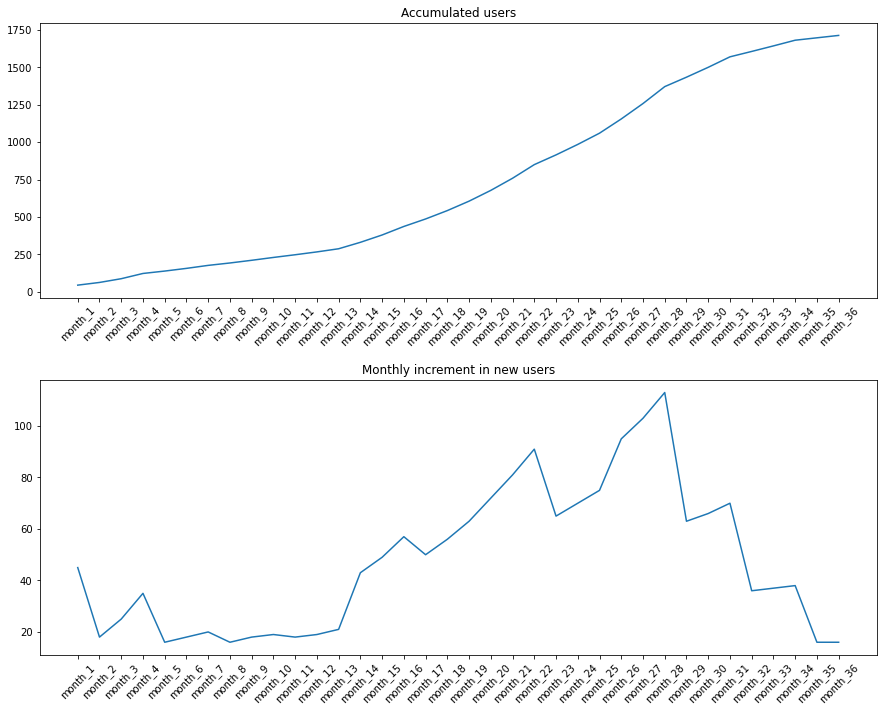

In [5]:
plt.rcParams["figure.figsize"] = (15,9)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(users_per_month["Month"], users_per_month["TotalUsers"])
ax1.tick_params('x', labelrotation=45)
ax2.tick_params('x', labelrotation=45)
ax1.set_title("Accumulated users")
ax2.plot(users_per_month["Month"], users_per_month["NewUsers"])
ax2.set_title("Monthly increment in new users")
plt.subplots_adjust(top=1.1, 
                    hspace=0.3)
plt.show()

In [6]:
with_day = add_date_column(users_per_month)
with_day.head()

,Month,MonthlyGrowth,TotalUsers,NewUsers,Date
0,month_1,0.400000,45,45,2018-07-01
1,month_2,0.400000,63,18,2018-08-01
2,month_3,0.400000,88,25,2018-09-01
3,month_4,0.133333,123,35,2018-10-01
4,month_5,0.133333,139,16,2018-11-01


In [7]:
users_per_day = new_users_per_day(with_day)
users_per_day[:5]

[3, 4, 1, 2, 0]

In [8]:
list_of_bdays = bdays_in_period(with_day)
list_of_bdays[:5]

[Timestamp('2018-07-02 00:00:00', freq='B'),
 Timestamp('2018-07-03 00:00:00', freq='B'),
 Timestamp('2018-07-04 00:00:00', freq='B'),
 Timestamp('2018-07-05 00:00:00', freq='B'),
 Timestamp('2018-07-06 00:00:00', freq='B')]

In [9]:
users_dataset = conc_days_users(list_of_bdays, users_per_day)
users_dataset.head(10)

,Date,NewDailyUsers
0,2018-07-02,3
1,2018-07-03,4
2,2018-07-04,1
3,2018-07-05,2
4,2018-07-06,0
5,2018-07-09,1
6,2018-07-10,2
7,2018-07-11,2
8,2018-07-12,2
9,2018-07-13,2


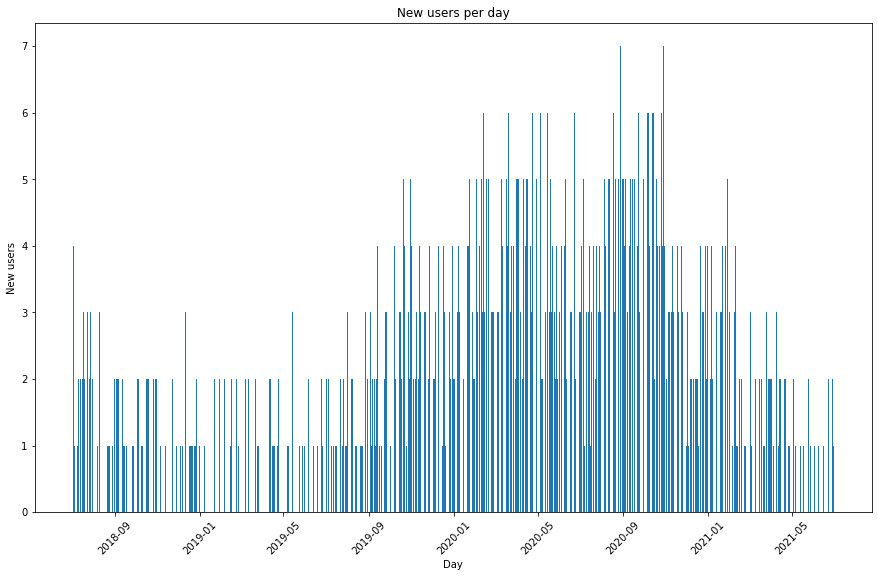

In [10]:
plt.bar(users_dataset["Date"], users_dataset["NewDailyUsers"])
plt.title('New users per day')
plt.xlabel('Day')
plt.xticks(rotation = 45)
plt.ylabel('New users')
plt.show()

In [11]:
first_dataset = dataset_1_v1(users_dataset)

In [12]:
list(first_dataset.items())[25:50]

[('user_25', '18/07/2018'),
 ('user_26', '19/07/2018'),
 ('user_27', '19/07/2018'),
 ('user_28', '23/07/2018'),
 ('user_29', '23/07/2018'),
 ('user_30', '23/07/2018'),
 ('user_31', '24/07/2018'),
 ('user_32', '24/07/2018'),
 ('user_33', '25/07/2018'),
 ('user_34', '25/07/2018'),
 ('user_35', '26/07/2018'),
 ('user_36', '26/07/2018'),
 ('user_37', '27/07/2018'),
 ('user_38', '27/07/2018'),
 ('user_39', '27/07/2018'),
 ('user_40', '30/07/2018'),
 ('user_41', '30/07/2018'),
 ('user_42', '31/07/2018'),
 ('user_43', '03/08/2018'),
 ('user_44', '06/08/2018'),
 ('user_45', '09/08/2018'),
 ('user_46', '09/08/2018'),
 ('user_47', '09/08/2018'),
 ('user_48', '10/08/2018'),
 ('user_49', '13/08/2018')]

In [13]:
first_name_dataset = get_firstname("../data/nat2020.csv", first_dataset)

In [14]:
first_name_dataset[:20]

['JEAN-MICHEL',
 'JEAN',
 'MARTIN',
 'PASCAL',
 'NICOLAS',
 'GAËTAN',
 'MANON',
 'CÉLINE',
 'SYLVIE',
 'NATHALIE',
 'WILLIAM',
 'ANTOINE',
 'DIDIER',
 'ISABELLE',
 'DOMINIQUE',
 'GÉRALD',
 'ANIS',
 'OUAHID',
 'LAURA',
 'TESSA']

In [15]:
full_name = get_lastname("../data/noms2008nat_txt.txt", first_name_dataset)

In [16]:
full_name.head(20)

,FirstName,LastName
0,JEAN-MICHEL,PETT
1,JEAN,GUIGUES
2,MARTIN,JACQUES
3,PASCAL,ROBERGE
4,NICOLAS,DELESTRE
5,GAËTAN,MIREMONT
6,MANON,JEAN
7,CÉLINE,MADRE
8,SYLVIE,DUFOUR
9,NATHALIE,LANSAC


In [17]:
dataset_v1 = full_name_date(full_name, first_dataset)

In [18]:
dataset_v1[20:40]

,FirstName,LastName,Date
20,SALOMÉ,CAMBON,16/07/2018
21,JOAQUIM,BARTHELEMY,17/07/2018
22,JONATHAN,ETIENNE,17/07/2018
23,ZARA,CORDIER,17/07/2018
24,EMELINE,YOUSSEFI,18/07/2018
25,GILLES,STEYER,18/07/2018
26,JESSICA,ABBAS,19/07/2018
27,CHARLINE,KERAVEN,19/07/2018
28,OLIVIA,VACHERON,23/07/2018
29,AURORE,FROMENTE,23/07/2018
